In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [7]:
#some high school is being considered as same as high school degree
#changing some college to college and some high school to high school
df['parental level of education'] = df['parental level of education'].replace({'some college':'college','some high school':'high school'})
df['parental level of education'].unique()

array(["bachelor's degree", 'college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

# Statistics of Marks Distribution

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


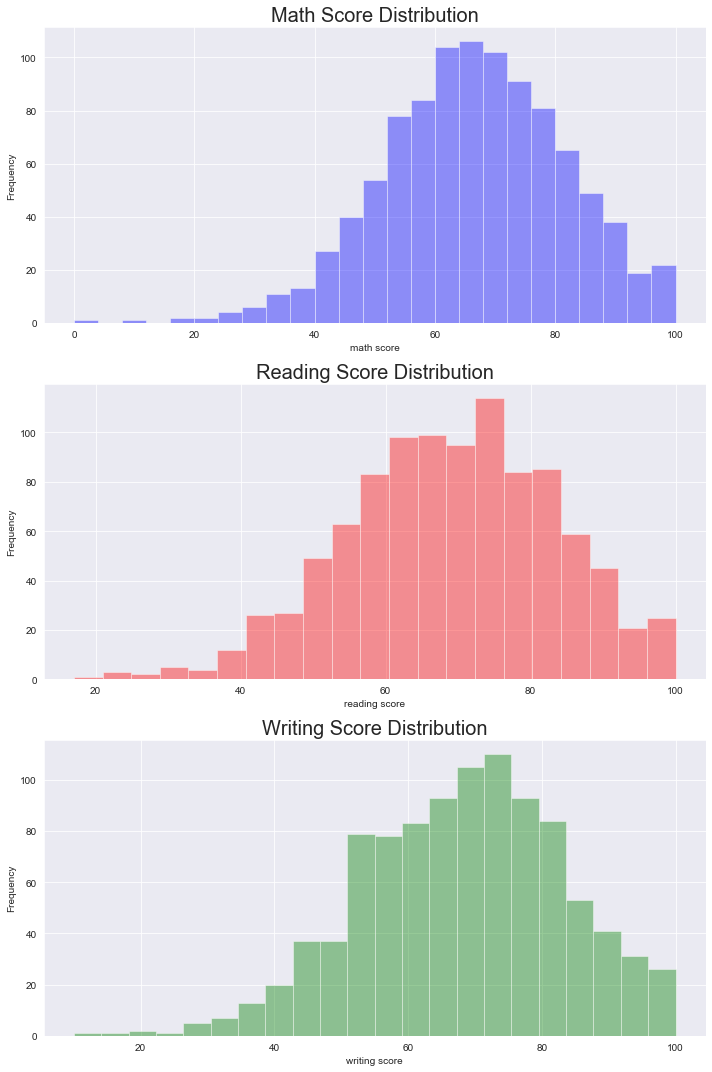

In [9]:
plt.figure(figsize = (10,15))

plt.subplot(3,1,1)
sns.distplot(df['math score'], kde = False, color='b')
plt.ylabel('Frequency')
plt.title('Math Score Distribution',fontsize=20)

plt.subplot(3,1,2)
sns.distplot(df['reading score'], kde = False, color='r')
plt.ylabel('Frequency')
plt.title('Reading Score Distribution',fontsize=20)

plt.subplot(3,1,3)
sns.distplot(df['writing score'], kde = False, color='g')
plt.ylabel('Frequency')
plt.title('Writing Score Distribution',fontsize=20)

plt.tight_layout()

The mean of the marks of the three subjects lie between 66-69 with high frequency of marks between 60-80

# Adding Grade column

In [10]:
# Creating columns of whether the students passed their class or not
# If the marks are < 40 means Fail otherwise Pass.

df["math grade"] = np.where(df["math score"]<40,"Fail" , "Pass")
df["reading grade"] = np.where(df["reading score"]<40, "Fail" , "Pass")
df["writing grade"] = np.where(df["writing score"]<40, "Fail" , "Pass")

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math grade,reading grade,writing grade
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass
1,female,group C,college,standard,completed,69,90,88,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass
4,male,group C,college,standard,none,76,78,75,Pass,Pass,Pass


In [12]:
#Failed Students
failed_math = df['math grade'] == 'Fail'
failed_reading = df['reading grade'] == 'Fail'
failed_writing = df['writing grade'] == 'Fail'

fail_all= df[(failed_math) & (failed_reading) & (failed_writing)]
failed_students = df[(failed_math) | (failed_reading)|(failed_writing)]
passed_students = len(df) - len(failed_students)

print('Number of students who passed in all three subjects: ',passed_students)
print('Number of students who failed in atleast one subject: ',len(failed_students))
print('Number of students who failed in all three subjects: ',len(fail_all))

Number of students who passed in all three subjects:  949
Number of students who failed in atleast one subject:  51
Number of students who failed in all three subjects:  18


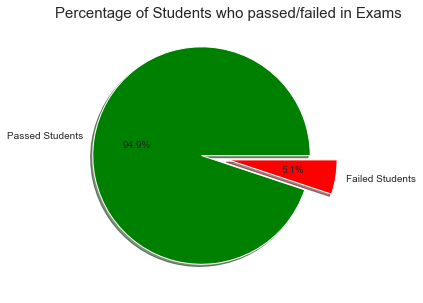

In [13]:
plt.figure(figsize=(5,5))

#Data to plot
labels = ['Passed Students', 'Failed Students']
color = ['green', 'red']
sizes = [passed_students,len(failed_students)]

#Plot
plt.pie(sizes,explode = (.25,0), labels = labels,autopct='%1.1f%%',shadow = True,colors=color)
plt.title('Percentage of Students who passed/failed in Exams',fontsize=15)
plt.show()

# Gender

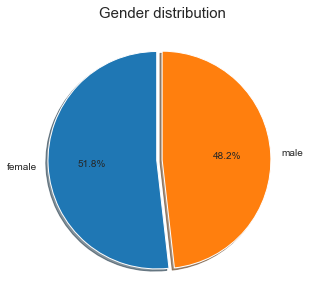

In [14]:
plt.figure(figsize=(5,5))

labels = df['gender'].unique()
size = df['gender'].value_counts()

plt.pie(size,labels=labels,autopct="%1.1f%%",shadow=True,explode=(0.05,0),startangle=90)
plt.title('Gender distribution',fontsize=15)
plt.show()

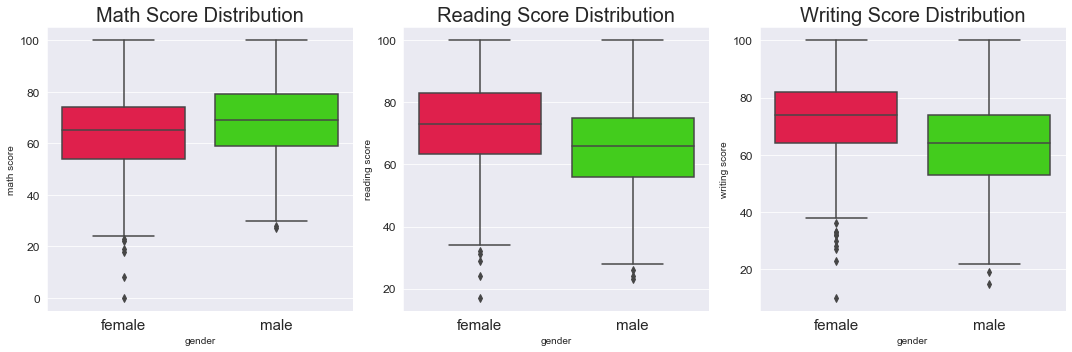

In [15]:
plt.figure(figsize=(15,5))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=12)

plt.subplot(1,3,1)
sns.boxplot(x = 'gender', y = 'math score', data = df, palette = "prism_r")
plt.title('Math Score Distribution',fontsize=20)

plt.subplot(1,3,2)
sns.boxplot(x = 'gender', y = 'reading score', data = df, palette = "prism_r")
plt.title('Reading Score Distribution',fontsize=20)

plt.subplot(1,3,3)
sns.boxplot(x = 'gender', y = 'writing score', data = df, palette = "prism_r")
plt.title('Writing Score Distribution',fontsize=20)

plt.tight_layout()

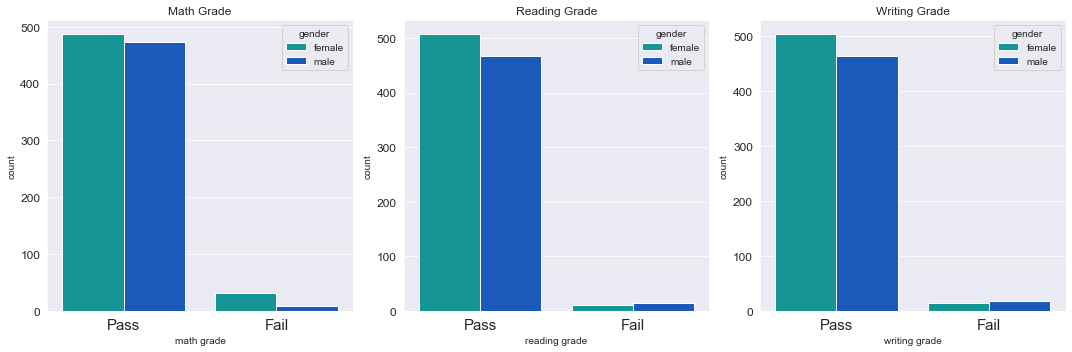

In [16]:
plt.figure(figsize=(15,5))


plt.subplot(1,3,1)
sns.countplot(x = "math grade" ,hue="gender" , data=df ,palette="winter_r")
plt.title("Math Grade")

plt.subplot(1,3,2)
sns.countplot(x = "reading grade" ,hue="gender" , data=df ,palette="winter_r")
plt.title("Reading Grade")

plt.subplot(1,3,3)
sns.countplot(x = "writing grade" ,hue="gender" , data=df ,palette="winter_r")
plt.title("Writing Grade")

plt.tight_layout()

 - The gender proportion is almost same
 - Male students perform better in maths whereas female students perform better in reading and writing
 - From the outliers in boxplot, we can observe that few female students scored very low as compared to boys.

# Race/Ethnicity

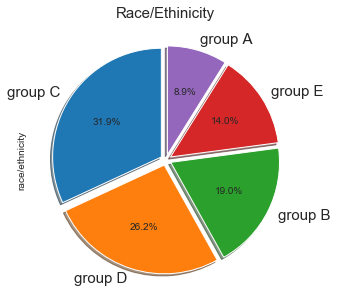

In [17]:
plt.figure(figsize=(5,5))

df['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%",shadow=True,explode=(0.05,0.05,0.05,0.05,0.05),startangle=90)
plt.title('Race/Ethinicity',fontsize=15)
plt.show()

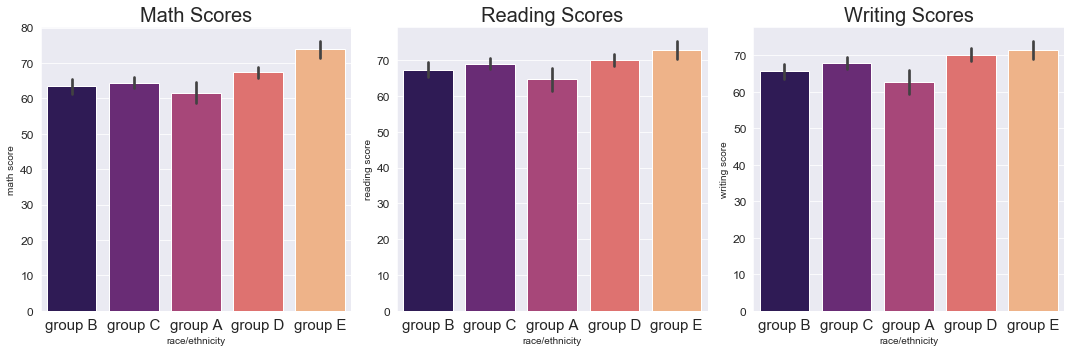

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(x = "race/ethnicity" , y = "math score" , data = df, palette="magma")
plt.title("Math Scores",fontsize=20)

plt.subplot(1,3,2)
sns.barplot(x = "race/ethnicity" , y = "reading score" , data = df, palette="magma")
plt.title("Reading Scores",fontsize=20)

plt.subplot(1,3,3)
sns.barplot(x = "race/ethnicity" , y = "writing score" , data = df, palette="magma")
plt.title("Writing Scores",fontsize=20)

plt.tight_layout()

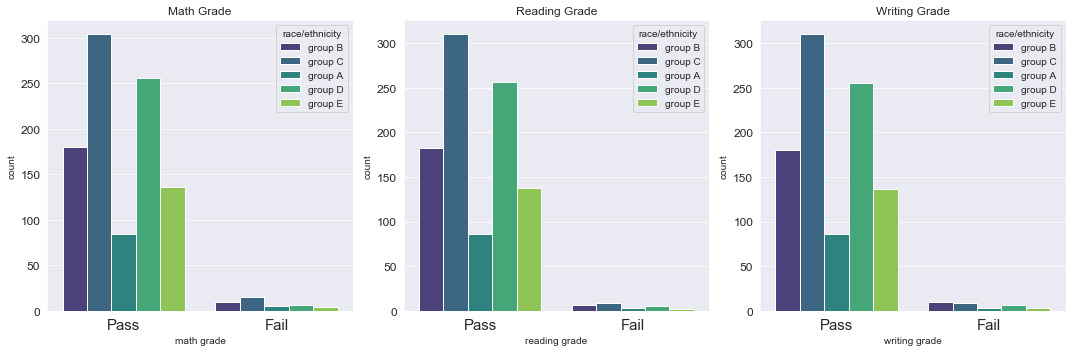

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x = "math grade" ,hue="race/ethnicity" , data=df ,palette="viridis")
plt.title("Math Grade")

plt.subplot(1,3,2)
sns.countplot(x = "reading grade" ,hue="race/ethnicity" , data=df ,palette="viridis")
plt.title("Reading Grade")

plt.subplot(1,3,3)
sns.countplot(x = "writing grade" ,hue="race/ethnicity" , data=df ,palette="viridis")
plt.title("Writing Grade")

plt.tight_layout()

 - Most of the students belong to Group C whereas least belong to group A
 - Students belonging to group E have the highest scores in all 3 categories 
 - Students belonging to group A have the lowest scores in all 3 categories 

# Parental Level of Education

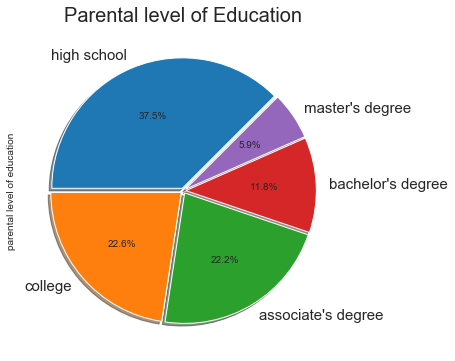

In [20]:
plt.figure(figsize=(6,6))

df['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%",shadow=True,startangle=45,
                                                          explode = np.repeat(0.02,5))
plt.title('Parental level of Education',fontsize=20)

plt.show()

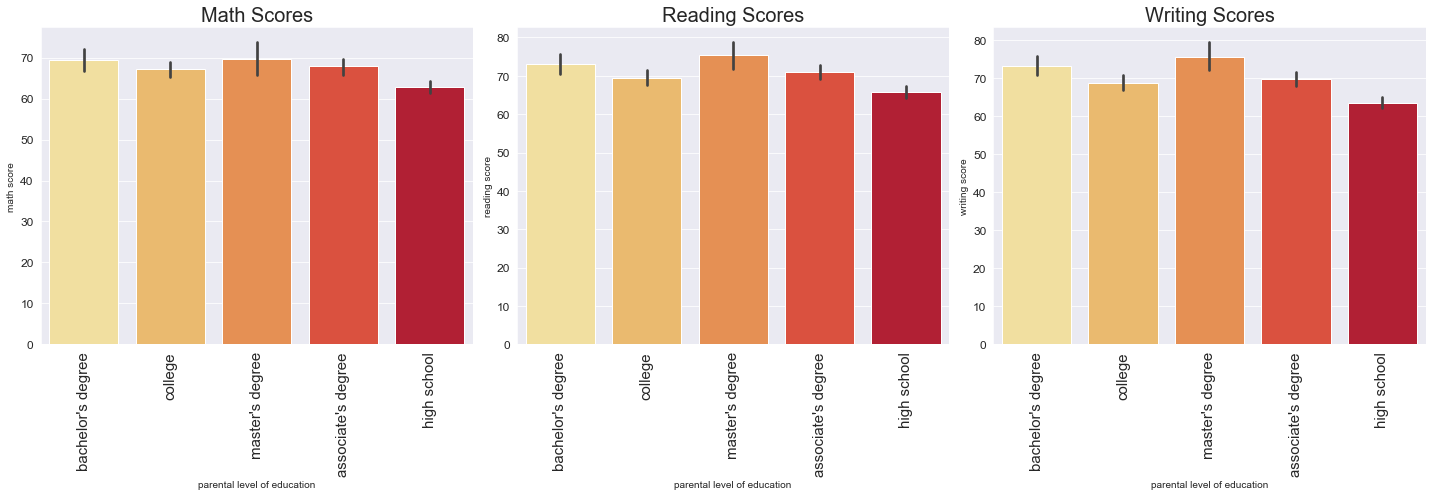

In [21]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
sns.barplot(x = "parental level of education" , y="math score" , data=df, palette="YlOrRd")
plt.xticks(rotation=90)
plt.title("Math Scores",fontsize=20)

plt.subplot(1,3,2)
sns.barplot(x = "parental level of education" , y="reading score" , data=df, palette="YlOrRd")
plt.xticks(rotation=90)
plt.title("Reading Scores",fontsize=20)

plt.subplot(1,3,3)
sns.barplot(x = "parental level of education" , y="writing score" , data=df, palette="YlOrRd")
plt.xticks(rotation=90)
plt.title("Writing Scores",fontsize=20)

plt.tight_layout()

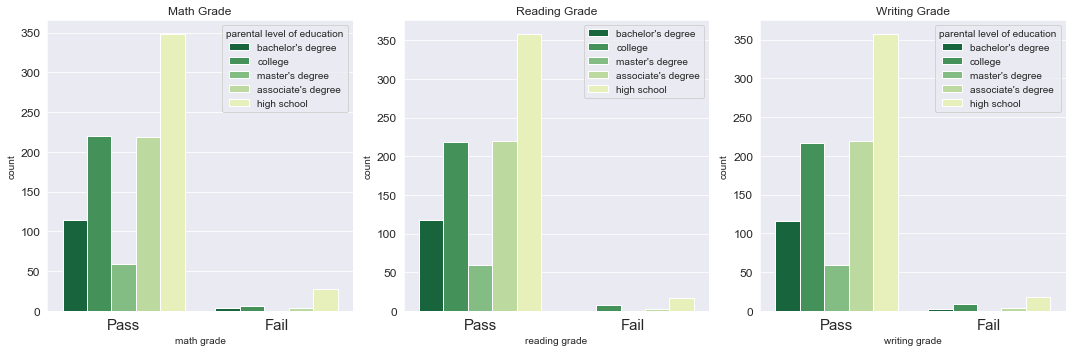

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x = "math grade" ,hue="parental level of education" , data=df ,palette="YlGn_r")
plt.title("Math Grade")

plt.subplot(1,3,2)
sns.countplot(x = "reading grade" ,hue="parental level of education" , data=df ,palette="YlGn_r")
plt.legend(loc="upper right")
plt.title("Reading Grade")

plt.subplot(1,3,3)
sns.countplot(x = "writing grade" ,hue="parental level of education" , data=df ,palette="YlGn_r")
plt.title("Writing Grade")

plt.tight_layout()

 - Proportion of parents having high school degree is the highest.
 - Proportion of parents having master's degree is the least.
 - Students whose parents have master's degree have highest scores
 - Students whose parents have high school degree have lowest scores
 - Thus, Parent's level of education affects the student's score.

# Test Preparation Course

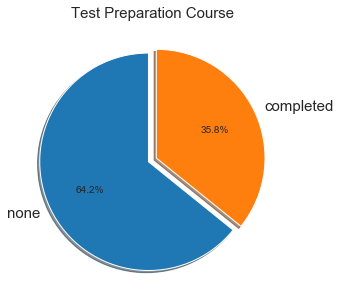

In [23]:
plt.figure(figsize=(5,5))

labels = df['test preparation course'].unique()
size = df['test preparation course'].value_counts()

plt.pie(size,labels=labels,autopct="%1.1f%%",shadow=True,explode=(0.04,0.04),startangle=90)
plt.title('Test Preparation Course',fontsize=15)
plt.show()

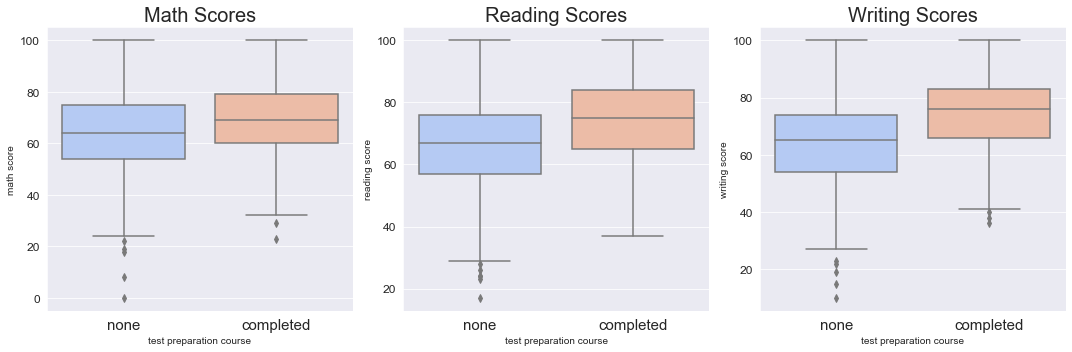

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x = "test preparation course" , y="math score" , data=df, palette='coolwarm')
plt.title("Math Scores",fontsize=20)

plt.subplot(1,3,2)
sns.boxplot(x = "test preparation course" , y="reading score" , data=df, palette='coolwarm')
plt.title("Reading Scores",fontsize=20)

plt.subplot(1,3,3)
sns.boxplot(x = "test preparation course" , y="writing score" , data=df, palette='coolwarm')
plt.title("Writing Scores",fontsize=20)

plt.tight_layout()

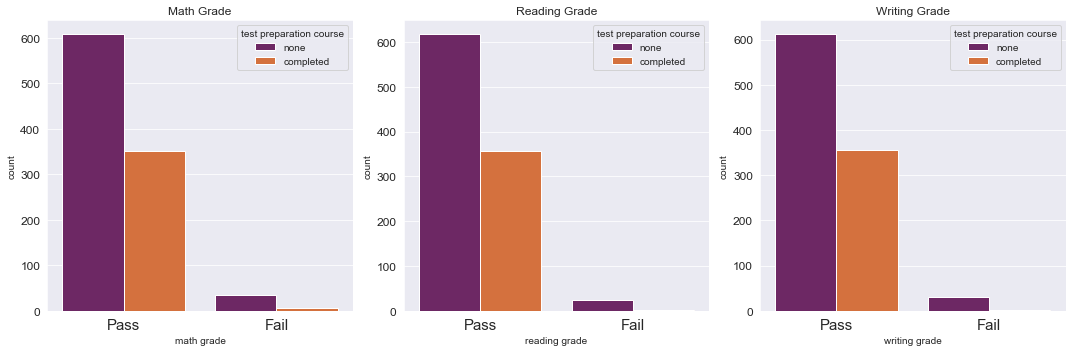

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x = "math grade" ,hue="test preparation course" , data=df ,palette="inferno")
plt.title("Math Grade")

plt.subplot(1,3,2)
sns.countplot(x = "reading grade" ,hue="test preparation course" , data=df ,palette="inferno")
plt.title("Reading Grade")

plt.subplot(1,3,3)
sns.countplot(x = "writing grade" ,hue="test preparation course" , data=df ,palette="inferno")
plt.title("Writing Grade")

plt.tight_layout()

 - About one third of the students have prepared for the test.
 - Students who have completed test preparation course have better scores than those who have not done preparation.
 - In Reading and Writing courses, none of the students have failed who have completed the test preparatiion courses and in maths very few have failed as compared to those have not prepared for it.

# Lunch

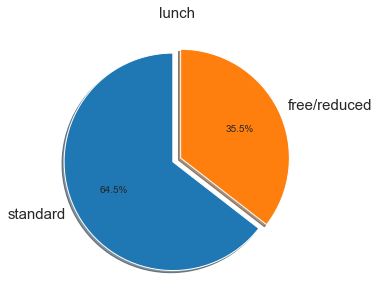

In [26]:
plt.figure(figsize=(5,5))

labels = df['lunch'].unique()
size = df['lunch'].value_counts()

plt.pie(size,labels=labels,autopct="%1.1f%%",shadow=True,explode=(0.04,0.04),startangle=90)
plt.title('lunch',fontsize=15)
plt.show()

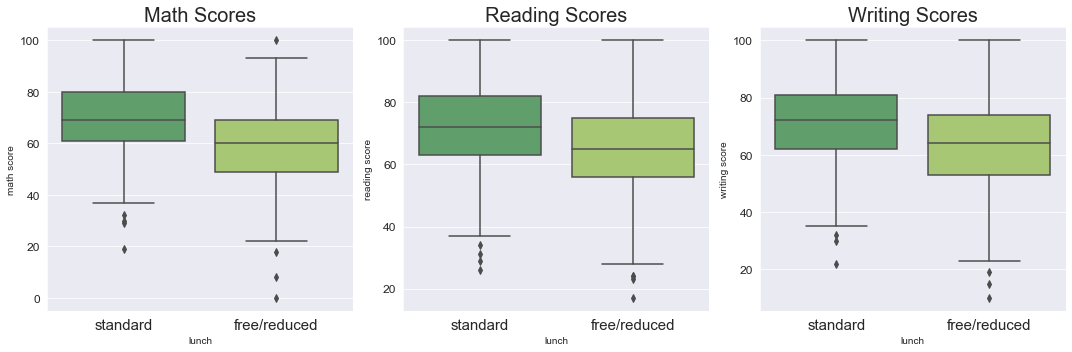

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x = "lunch" , y="math score" , data=df, palette='summer')
plt.title("Math Scores",fontsize=20)

plt.subplot(1,3,2)
sns.boxplot(x = "lunch" , y="reading score" , data=df, palette='summer')
plt.title("Reading Scores",fontsize=20)

plt.subplot(1,3,3)
sns.boxplot(x = "lunch" , y="writing score" , data=df, palette='summer')
plt.title("Writing Scores",fontsize=20)

plt.tight_layout()

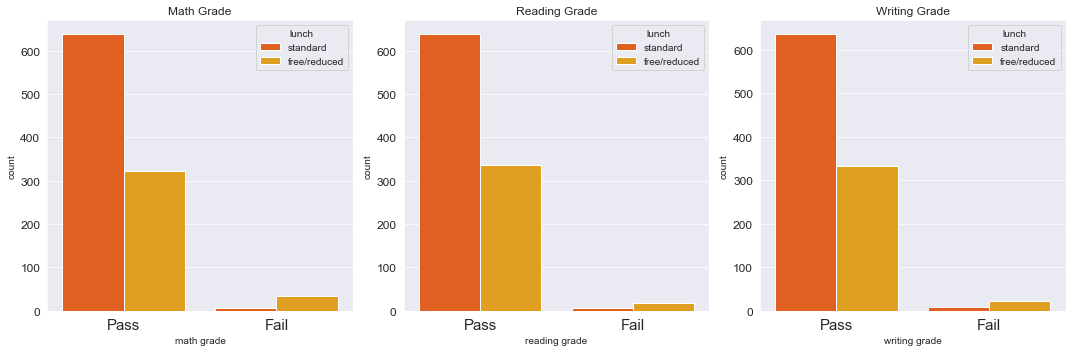

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x = "math grade" ,hue="lunch" , data=df ,palette="autumn")
plt.title("Math Grade")

plt.subplot(1,3,2)
sns.countplot(x = "reading grade" ,hue="lunch" , data=df ,palette="autumn")
plt.title("Reading Grade")

plt.subplot(1,3,3)
sns.countplot(x = "writing grade" ,hue="lunch" , data=df ,palette="autumn")
plt.title("Writing Grade")

plt.tight_layout()

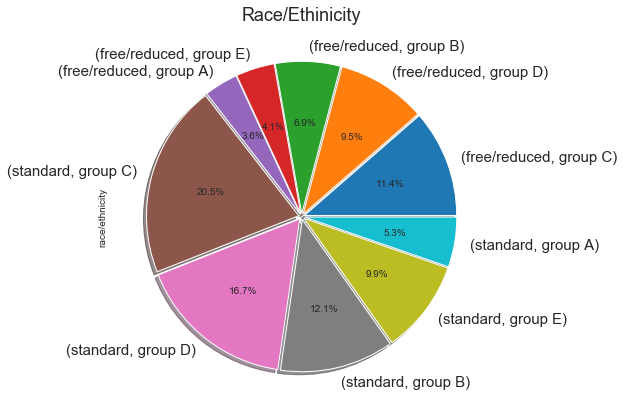

In [29]:
plt.figure(figsize=(7,7))

df.groupby('lunch')['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%",shadow=True,explode=np.repeat(0.02,10))
plt.title('Race/Ethinicity',fontsize=18)
plt.show()

 - Almost two thirds of students have standard lunch.
 - Students having standard lunch seem to perform better than the students having free/reduced lunch
 - There is no relation between the lunch taken by the student and race/ethnicity that student belong to. 